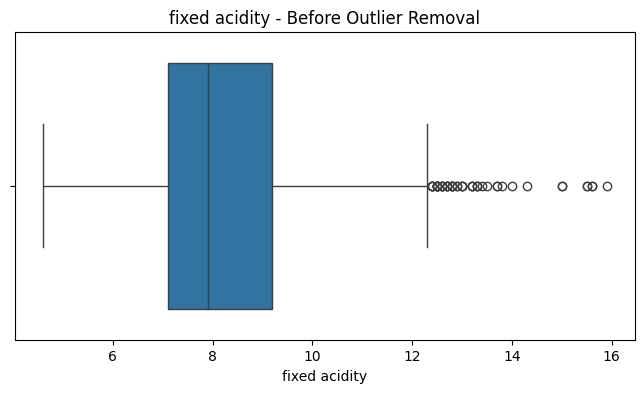

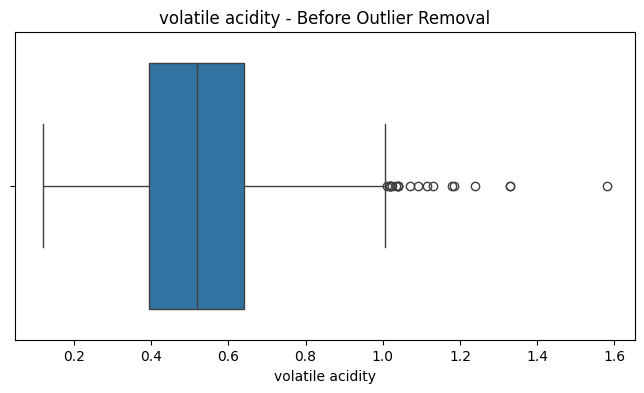

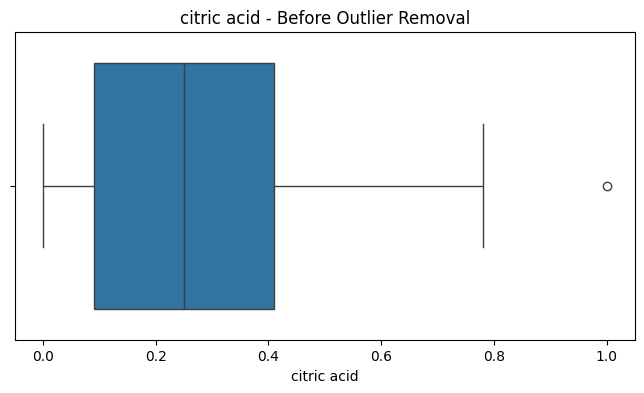

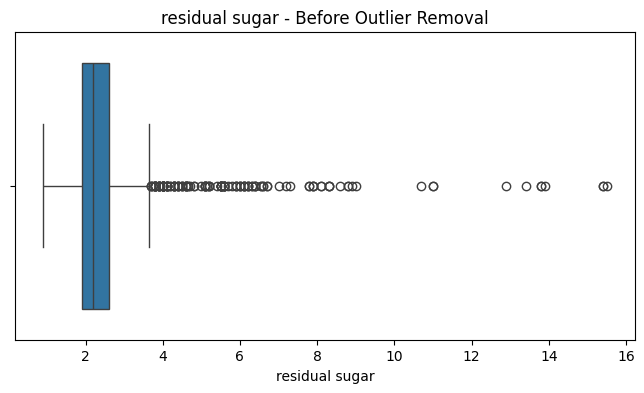

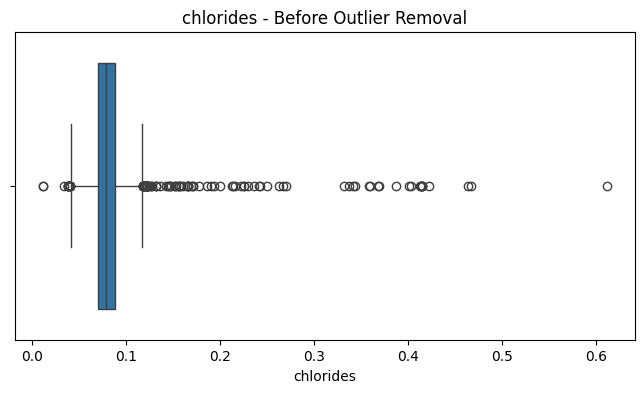

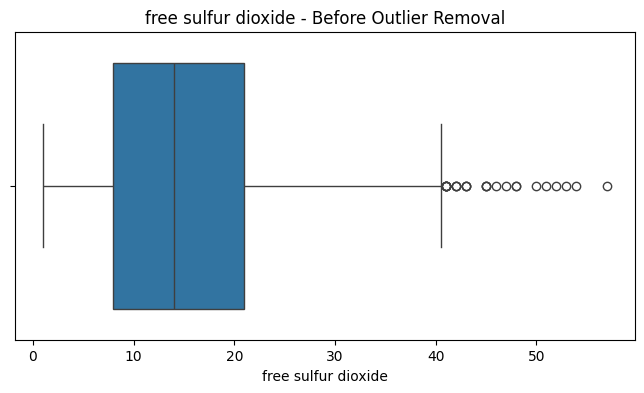

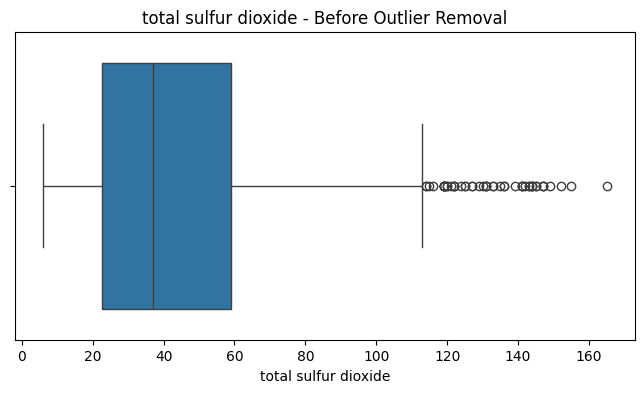

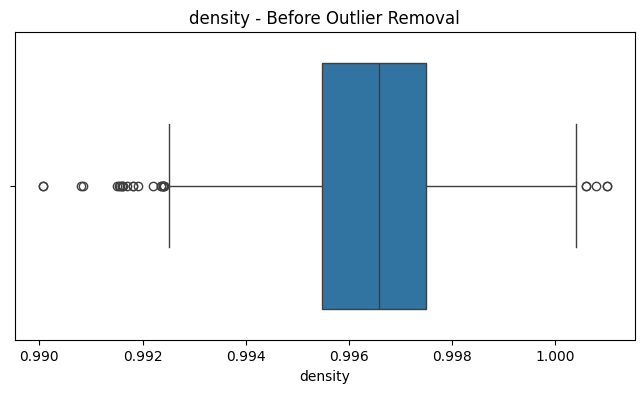

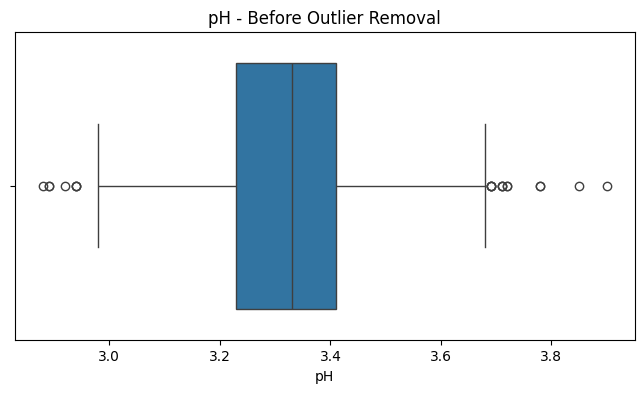

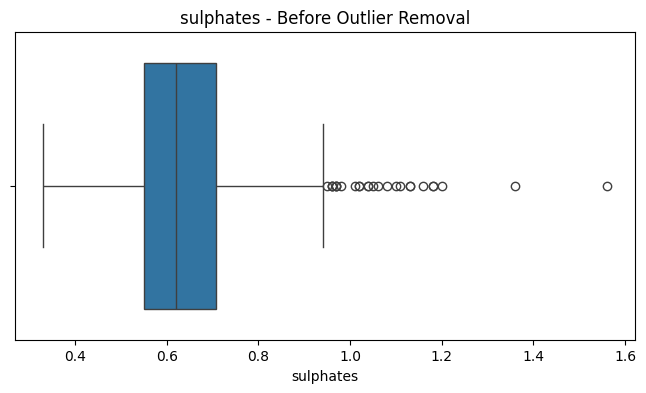

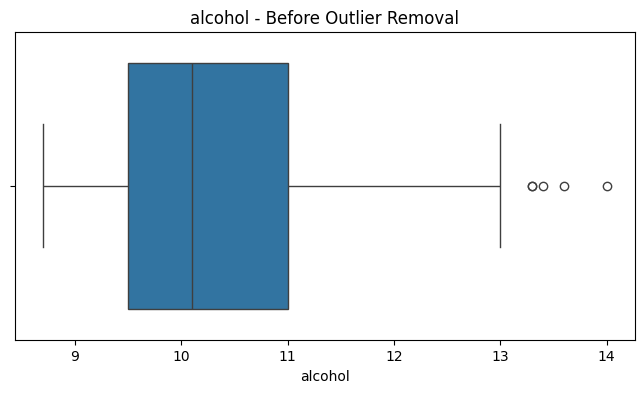

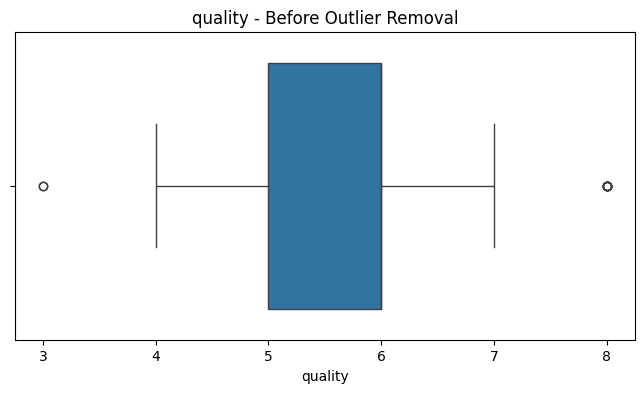

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Example: Load dataset
# (replace with your actual dataset path)
# ==========================
df = pd.read_csv("winequality-red.csv")

# ==========================
# Make a copy of the dataset
# ==========================
df_clean = df.copy()

# ==========================
# Select numeric columns
# ==========================
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# ==========================
# Loop through all numeric columns
# ==========================
for col in numeric_cols:
    # --- Boxplot Before Outlier Removal ---
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"{col} - Before Outlier Removal")
    plt.show()

    # --- Compute IQR and Remove Outliers ---
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only rows within the IQR limits for the current column
    df_clean = df_clean[(df_clean[col] >= lower_limit) & (df_clean[col] <= upper_limit)]

    # --- Boxplot After Outlier Removal ---
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"{col} - After Outlier Removal")
    plt.show()